# NLP Exploration

In [1]:
import re
import unicodedata
import pandas as pd

import nltk
import nltk.sentiment
from wordcloud import WordCloud
nltk.download('vader_lexicon')

import prepare

import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/desireemcelroy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/desireemcelroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. Spam Data

Load the spam data set.
 - a) Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
 - b) Is there any overlap in the bigrams for the spam data and the ham data?
 - c) Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [2]:
df = pd.read_csv('./spam_clean.csv')
print(df.shape)
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.sample(10)

,label,text
3367,ham,"Hey elaine, is today's meeting still on?"
3806,ham,Pls dont restrict her from eating anythin she ...
4496,ham,Ok
5379,ham,Somebody set up a website where you can play h...
3444,ham,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...
2235,ham,\Si.como no?!listened2the plaid album-quite gd...
5190,spam,Our records indicate u maybe entitled to 5000 ...
4406,ham,"Awesome, plan to get here any time after like ..."
2394,ham,I don't run away frm u... I walk slowly &amp; ...
4161,ham,How's it going? Got any exciting karaoke type ...


In [4]:
clean = []
for i in df.text:
    normalize = prepare.basic_clean(i)
    
    clean.append(prepare.tokenize(normalize))
    
df['clean'] = clean



### 
stemmed=[] 
for i in df.clean:
  
    stem = prepare.stem(i)
    stemmed.append(prepare.remove_stopwords(stem, additional_stopwords=['r', 'u', '2', 'ltgt', '4', 'ur', 'k']))
    
df['stemmed'] = stemmed
    

    
###  
lemmatized=[] 
for i in df.clean:
  
    lemmatize = prepare.lemmatize(i)
    lemmatized.append(prepare.remove_stopwords(lemmatize, additional_stopwords=['r', 'u', '2', 'ltgt', '4', 'ur', 'k']))
    
df['lemmatized'] = lemmatized

In [5]:
df.head()

,label,text,clean,stemmed,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go jurong point crazi avail onli bugi n great ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif oni,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entri wkli comp win fa cup final tkt 21st...,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,dun say earli hor c alreadi say,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goe usf live around though,nah dont think go usf life around though


In [6]:
type(df.clean)

pandas.core.series.Series

In [7]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
# join words into a string
ham_words = ' '.join(df[df.label == 'ham'].lemmatized)
spam_words = ' '.join(df[df.label == 'spam'].lemmatized)
all_words = ' '.join(df.lemmatized)

In [9]:
# first 50 letters of the string
ham_words[:50]

'go jurong point crazy available bugis n great worl'

In [10]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [11]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279


- What are the most frequently occuring words?
- Are there any words that uniquely identify a spam or ham message? I.e. words present in one type of message but not the other?

In [12]:
word_counts.sort_values('all', ascending=False).head(30)

,ham,spam,all
call,241,359,600
im,449,13,462
get,314,83,397
go,273,31,304
dont,257,22,279
ok,272,5,277
free,59,216,275
know,241,26,267
come,242,5,247
like,232,13,245


In [13]:
word_counts.sort_values(['spam', 'ham'], ascending=[True, False]).head(30)

,ham,spam,all
lor,160,0,160
later,134,0,134
da,132,0,132
say,118,0,118
thats,94,0,94
ask,88,0,88
said,86,0,86
amp,82,0,82
didnt,79,0,79
morning,78,0,78


- ham vs spam count for 20 most common words
- ham vs spam proportion for 20 most common words

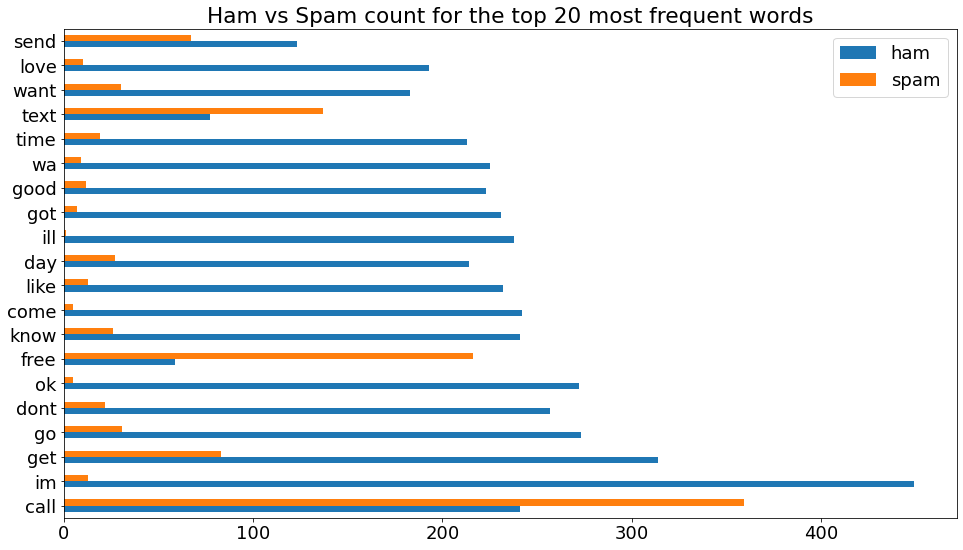

In [14]:
plt.rc('font', size=18)
plt.rc('figure',figsize=(16,9))
word_counts.sort_values('all', ascending=False).head(20)[['ham', 'spam']].plot.barh()
plt.title('Ham vs Spam count for the top 20 most frequent words');

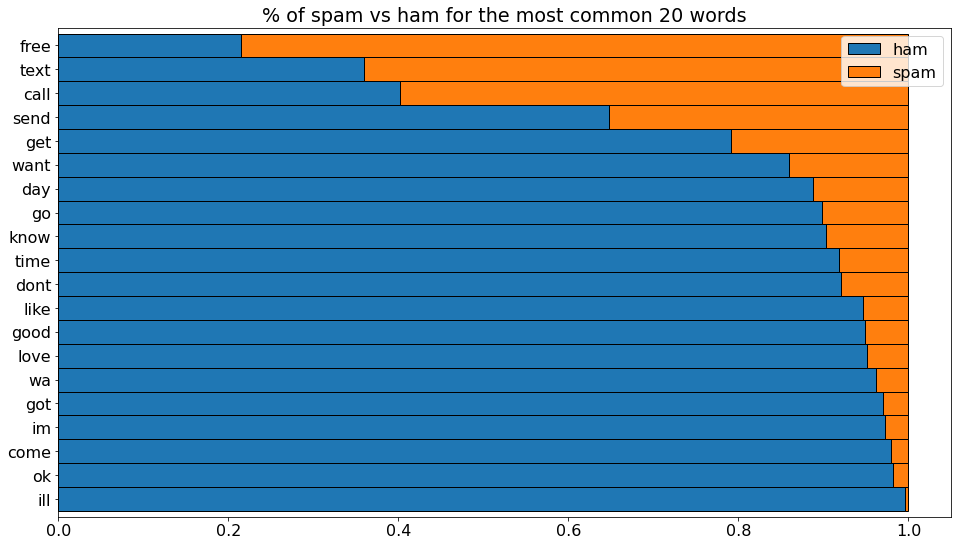

In [15]:
plt.rc('figure',figsize=(16,9))
plt.rc('font', size=16)
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='spam')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of spam vs ham for the most common 20 words');

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

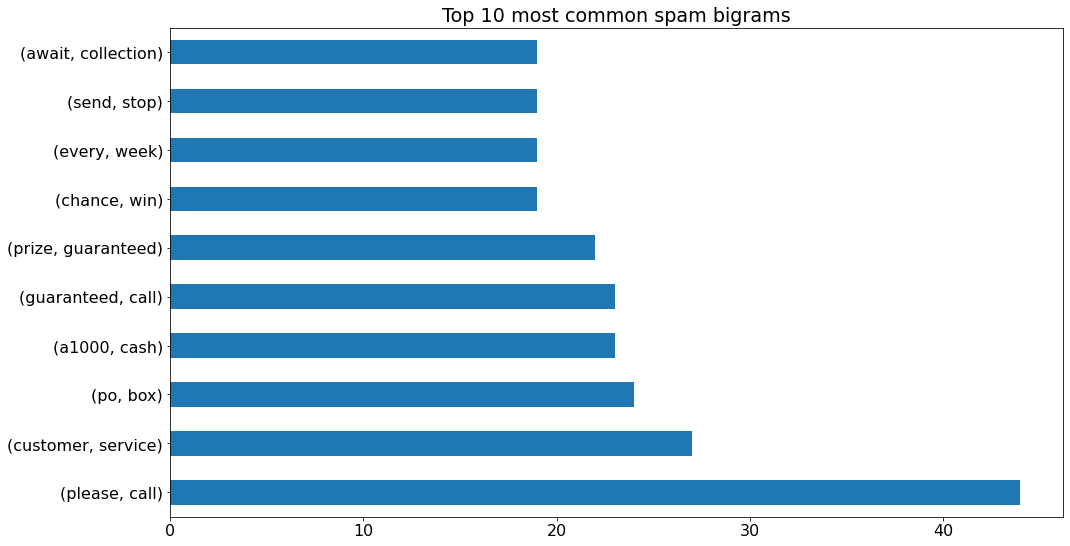

In [16]:
plt.rc('figure',figsize=(16,9))
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')

(-0.5, 799.5, 599.5, -0.5)

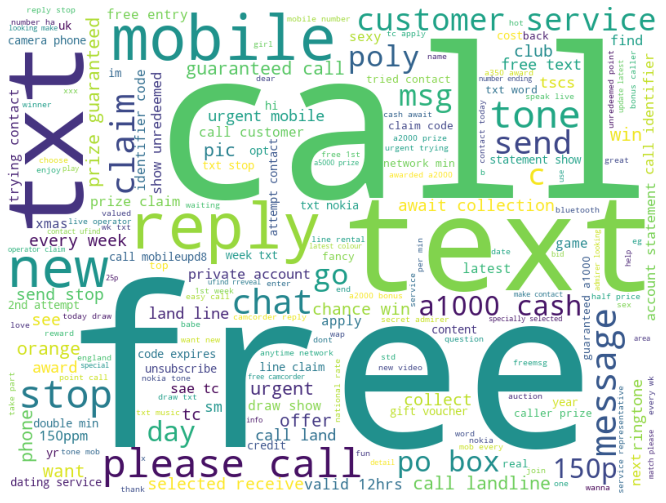

In [17]:
plt.rc('figure',figsize=(16,9))
img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')

In [18]:
df.head()

,label,text,clean,stemmed,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go jurong point crazi avail onli bugi n great ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif oni,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entri wkli comp win fa cup final tkt 21st...,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,dun say earli hor c alreadi say,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goe usf live around though,nah dont think go usf life around though


In [19]:
def ngrams_wordcloud (text_list, title_list, n=2):
    for i in range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

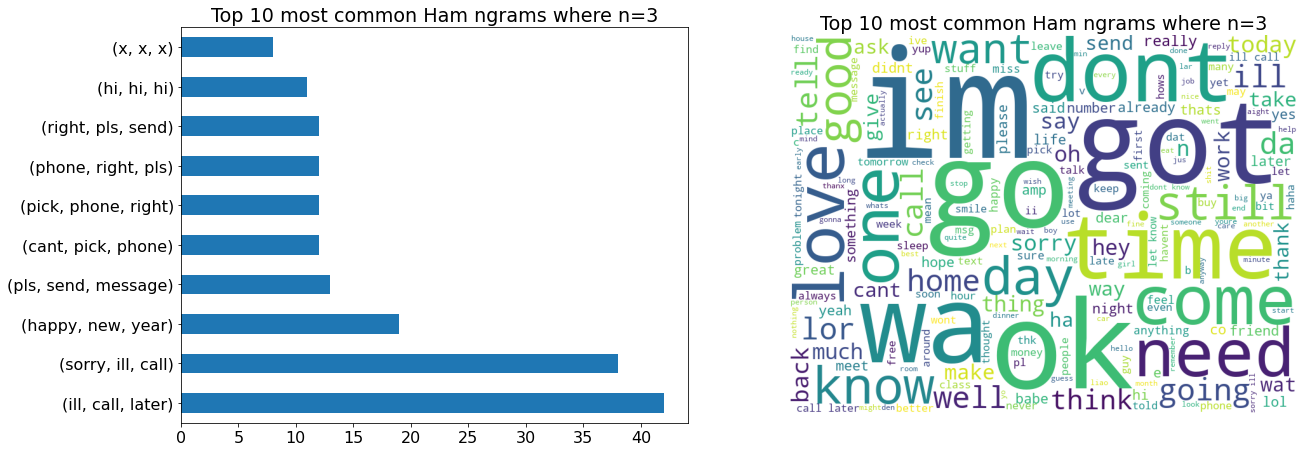

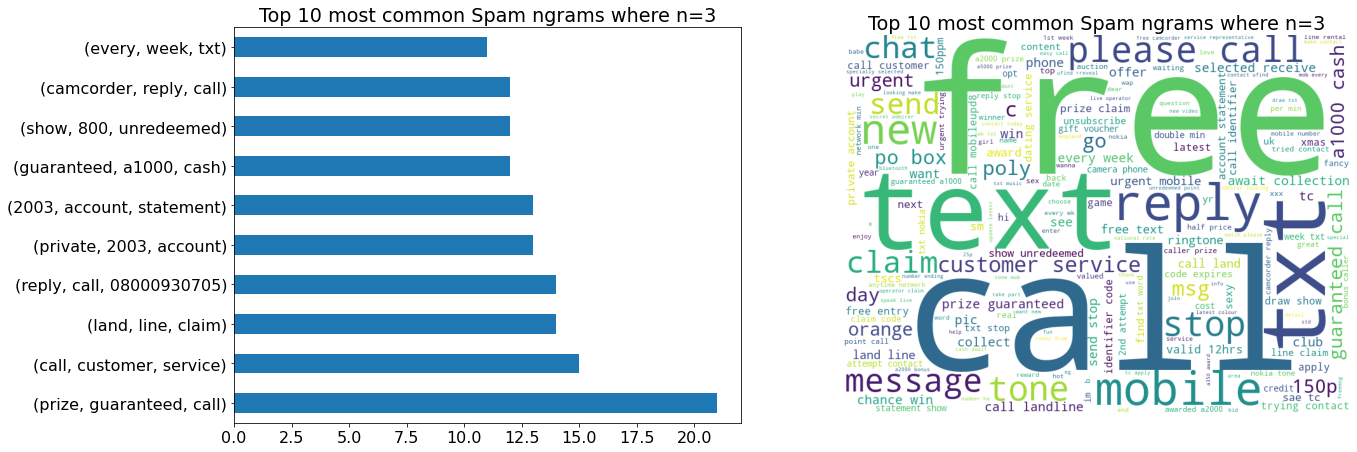

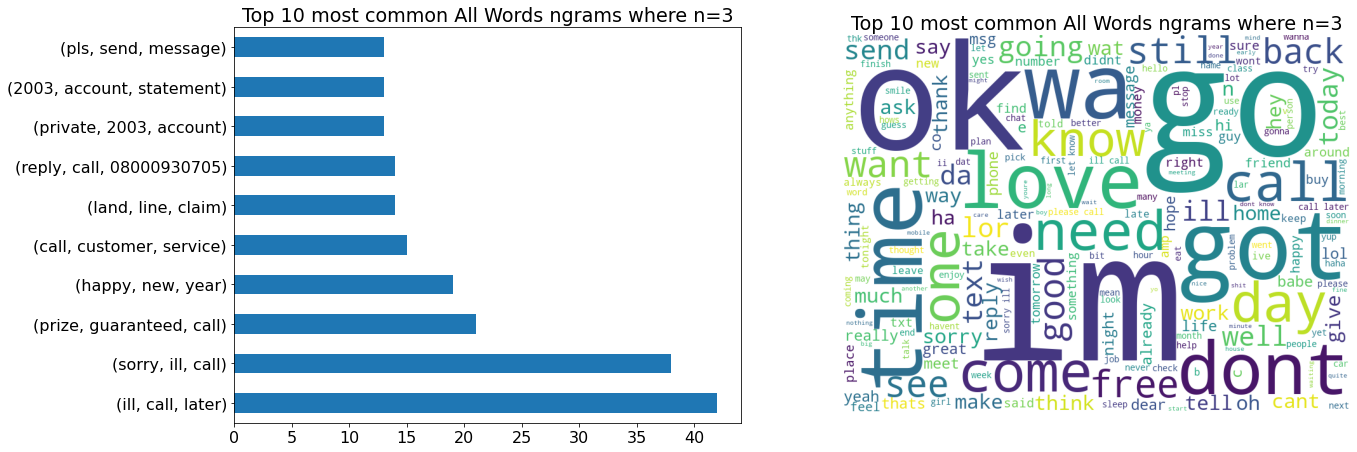

In [20]:
# trigram using function above
text_list = [ham_words, spam_words, all_words]
title_list = ['Ham', 'Spam', 'All Words']
ngrams_wordcloud (text_list, title_list, n=3)

**Other Common Features**
\
Any NLP dataset will have domain specific features, for example: number of retweets, number of @mentions, number of upvotes, or mean time to respond to a support chat. In addition to these domain specific features, some common measures for a document are:

- character count
- word count
- sentence count
- stopword count
- unique word count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio

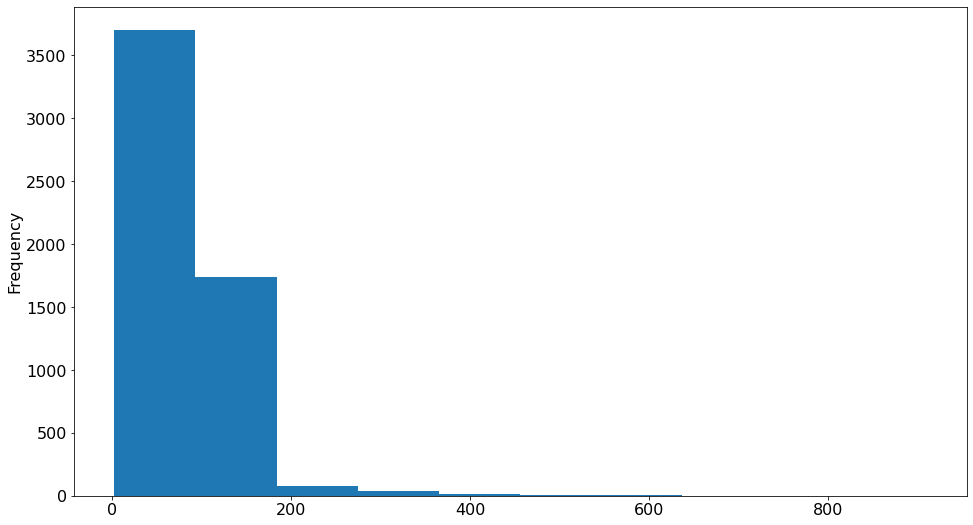

In [21]:
df['message_length'] = df.text.apply(len)

df.groupby('label').message_length.mean()

df.message_length.plot.hist();

In [22]:
df['word_count'] = df.clean.apply(str.split).apply(len)

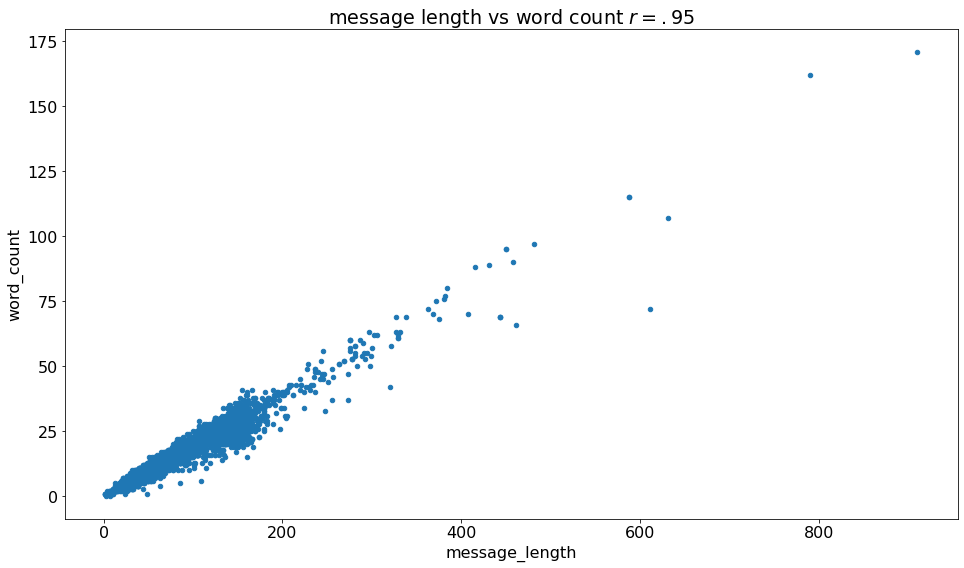

In [23]:
df.plot.scatter(y='word_count', x='message_length')
plt.title('message length vs word count $r = .95$');

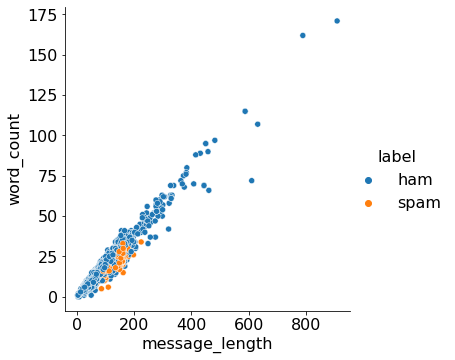

In [24]:
sns.relplot(data=df, y='word_count', x='message_length', hue='label')

**Sentiment**
A number indicating whether the document is positive or negative.

- knowledge-based + statistical approach
- relies on human-labelled data
    - valence scored wordlists
    - overall labels, measure is how well it compares to human judgement
- different models for diff domains (e.g. social media vs news)
- for social media
    - Afinn ([github](https://github.com/fnielsen/afinn) + [whitepaper](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=http%3A%2F%2Fcomp.social.gatech.edu%2Fpapers%2Ficwsm14.vader.hutto.pdf&clen=828942&chunk=true))
    - Vader ([whitepaper](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=http%3A%2F%2Fcomp.social.gatech.edu%2Fpapers%2Ficwsm14.vader.hutto.pdf&clen=828942&chunk=true) nltk.sentiment.vader.SentimentIntensityAnalyzer)

In [25]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/desireemcelroy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
# bring in the sentiment analyzer
sia = nltk.sentiment.SentimentIntensityAnalyzer()

# .polarity_scores()
sia.polarity_scores('Example message, probably neutral until I say it is stupid')

{'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'compound': -0.5267}

In [27]:
# apply to lemmatized column
df['sentiment_lem'] = df.lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df.head()

,label,text,clean,stemmed,lemmatized,message_length,word_count,sentiment_lem
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go jurong point crazi avail onli bugi n great ...,go jurong point crazy available bugis n great ...,111,20,0.4019
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif oni,ok lar joking wif oni,29,6,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entri wkli comp win fa cup final tkt 21st...,free entry wkly comp win fa cup final tkts 21s...,155,28,0.7964
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,dun say earli hor c alreadi say,dun say early hor c already say,49,11,0.0000
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goe usf live around though,nah dont think go usf life around though,61,13,-0.1027


In [28]:
df.

SyntaxError: invalid syntax (<ipython-input-28-38e9e33c87a8>, line 1)